In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
X, y = make_blobs(centers=2, random_state=0)

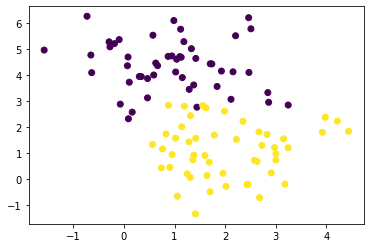

In [3]:
plt.scatter(X[:,0],X[:,1], c=y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
class CustomLogisticRegression:    
    
    # constructor
    def __init__(self, lr=0.01, iters=20):
        self.__lr = lr
        self.__iters = iters
    
    def fit(self, X, y):
        
        self.__y = y.reshape(-1, 1)
        # We need X in form of [1 x1 x2 x3 ---] so that we can take its dot product with theta matrix to get the equation of hypothesis plane
        X_mod = np.hstack([np.ones([len(X), 1]), X])
        self.__X = X_mod
        # Initially thetas are taken as 0 and its shape is taken such that its dot product is possible with X matrix
        self.__theta = np.zeros([X_mod.shape[1], 1])
        
        err = []
        for i in range(self.__iters):
            err.append(self.error())
            self.gradient_accend()
            
        self.theta_ = self.__theta 
            
        return err
        
    def gradient_accend(self):
        delta_theta = self.gradient()
        self.__theta -= delta_theta
        
    def gradient(self):
        yh = self.hypothesis(self.__X)
#         print(yh.shape) # (100, 1)
        ya = self.__y
        diff = -(ya - yh)     
        # For every feature we need to sum(diff * ith example)
        return np.dot(self.__X.T, diff) * self.__lr 
        
    def hypothesis(self, X):
        prod = np.dot(X, self.__theta)
#       
        return 1 / (1 + np.exp(-prod))
        
    def error(self):
        yh = self.hypothesis(self.__X)
        ya = self.__y
        # Since error was in product form so its complex to take its differentiation for large number of terms so log of equation is taken
        ll = ya*np.log(yh) + (1-ya)*np.log(1-yh)
#       # To get the error mean of all errors for each data is taken
        return -np.mean(ll)
    
    # Model predicts the probability of element belonging to first class (its probability to be in zeroth class can be found by subtracting given probabilty from 1)
    def predict(self, X):
        X_mod = np.hstack([np.ones([len(X), 1]), X])
        yh = self.hypothesis(X_mod)
    
        return (yh > .5).astype(int).flatten()
    
    def score(self, X, y):
        yp = self.predict(X)
        return np.mean(yp == y) * 100
    
    def confusion_matrix(self, X, y):
        yp = self.predict(X)
        
        tp = np.mean((y==1) & (yp==1))
        tn = np.mean((y==0) & (yp==0))
        fp = np.mean((y==0) & (yp==1))
        fn = np.mean((y==1) & (yp==0))
        
        return np.array([[tp, fp], [fn, tn]])


In [8]:
model = CustomLogisticRegression()

In [9]:
err = model.fit(X_train, y_train)

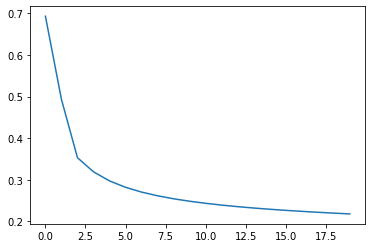

In [10]:
plt.plot(err)

In [11]:
model.score(X_test, y_test)

87.87878787878788

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
def_model = LogisticRegression()

In [21]:
def_model.fit(X_train, y_train)

LogisticRegression()

In [22]:
x1_sample = np.linspace(-6, 7)

In [23]:
colors = ["red", "blue"]
y_colors = list(map(lambda c: colors[c], y))

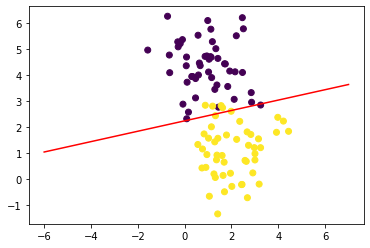

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=y)

for i, (coef, intercept) in enumerate(zip(def_model.coef_, def_model.intercept_)):
    x2_sample = -coef[0]/coef[1] * x1_sample - intercept/coef[1]
    plt.plot(x1_sample, x2_sample, color=colors[i])